<a href="https://colab.research.google.com/github/siliang625/text_mining_health/blob/master/Assignment_topic_modelling_20200705_300data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip list | grep gensim
# !pip install --upgrade gensim
# !pip install nltk
# !pip install spacy
# !pip install gensim
# !pip install pyLDAvis

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
root_path = '/content/drive/My Drive/[JOB] RA'

# Assignment

0: find colocation of words
- another thought: https://medium.com/@manjunathhiremath.mh/identifying-bigrams-trigrams-and-four-grams-using-word2vec-dea346130eb

1: doc-topic distribution

2: how to pick the best # of topics


In [5]:
import pandas as pd
import numpy as np
import os
import sklearn
import sys
np.set_printoptions(threshold=sys.maxsize)
from sklearn.model_selection import train_test_split
import re
from pprint import pprint
from glob import glob
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.nmf import Nmf
# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

from pathlib import Path
import glob
from bs4 import BeautifulSoup
import operator

In [8]:
path = root_path + "/sample_300/"
print(path)

/content/drive/My Drive/[JOB] RA/sample_300/


In [7]:
def get_abstract(soup):
    if soup.find("abstract") is None:
        return "NaN"
    
    return soup.find('abstract').text

In [9]:
def get_sample_data(path):
    pathlist = Path(path).glob('**/*.xml')
    # import pdb; pdb.set_trace()
    abstracts = []
    for path in pathlist:
        # because path is object not string
        path_in_str = str(path)
        soup = BeautifulSoup(open(path_in_str, 'r'))
        abstracts.append(get_abstract(soup))
        # todo: get full articles?

    return np.array(abstracts)


In [10]:
X = get_sample_data(path)
X.shape

(378,)

In [11]:
type(X)

numpy.ndarray

# Assignment0: co-location

In [12]:
nltk.download('stopwords')
nltk.download('punkt')
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [13]:
# data cleaning 

# Remove Emails
# data = [re.sub('\S*@\S*\s?', '', sent) for each in data]

# Remove new line characters
data = [re.sub('\s+', ' ', each) for each in X]

# # Remove distracting single quotes
# data = [re.sub("\'", "", sent) for each in data]

## Using Sklearn

Preprocessing include:

- tokenization
  - remove stop words

Tokenize the words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
cv = CountVectorizer(max_df = 0.95, min_df = 2, stop_words = 'english')
df = cv.fit_transform(data)

Apply LDA

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model1 = LatentDirichletAllocation(n_components = 15, random_state = 42) # n_components = topics
lda_model1.fit(df)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=15, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [ ]:
# def get_lda_topics(model, num_topics):
#     word_dict = {};
#     for i in range(num_topics):
#         words = model.show_topic(i, topn = 20)
#         word_dict['Topic #' + '{:02d}'.format(i+1)] = [i[0] for i in words]
#     return pd.DataFrame(word_dict)

# get_lda_topics(lda_model1, 15)

In [ ]:
for index, topic in enumerate(lda_model1.components_):
    print(f'Top 15 words for Topic #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

Top 15 words for Topic #0
['estimated', 'smokers', '10', 'total', 'reported', 'follow', 'information', 'results', 'patients', 'events', 'adults', 'risk', 'treatment', 'scores', 'acute']


Top 15 words for Topic #1
['patient', 'application', 'hypertension', 'patients', 'study', 'health', 'phone', 'randomized', 'mobile', 'paper', 'primary', 'care', 'time', 'pain', 'intervention']


Top 15 words for Topic #2
['follow', 'community', 'phone', 'intervention', 'using', 'care', 'visits', 'children', 'clinic', 'chws', '95', 'ci', 'mobile', 'depression', 'health']


Top 15 words for Topic #3
['using', 'factors', 'phones', 'chws', 'phone', 'learning', 'trial', 'outcomes', 'community', 'study', 'services', 'mobile', 'support', 'based', 'health']


Top 15 words for Topic #4
['findings', 'incidence', 'disease', 'tools', 'symptoms', 'respiratory', 'results', 'using', 'daily', 'based', 'treatment', 'alcohol', 'patients', 'use', 'risk']


Top 15 words for Topic #5
['months', 'score', 'data', 'risk', 'u

## Using Gensim

Preprocessing include:
- tokenization (remove punctuations, unecessary characters)
- remove stop words
- colocation: bigram -> trigram -> Quadgram data
- lemmatization


Tokenization: tokenize each sentence into a list of words, removing punctuations and unnecessary characters altogether.     

In [14]:
def tokenize_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(tokenize_to_words(data))
#data_words
data_words[:1]

[['graphical',
  'abstract',
  'cloud',
  'computing',
  'patient',
  'diagnosis',
  'video',
  'surveillance',
  'mobile',
  'computing',
  'microorganisms',
  'patient',
  'monitoring',
  'wireless',
  'sensor',
  'networks']]

Creating quadgram model

In [15]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold, fewer phrases to form
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
quadgram= gensim.models.Phrases(trigram[bigram[data_words]], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
quad_mod = gensim.models.phrases.Phraser(quadgram)

# See example
print(bigram_mod[data_words[10]])
print(trigram_mod[bigram_mod[data_words[10]]])
print(quad_mod[trigram_mod[bigram_mod[data_words[10]]]])


/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  Phrases detected in `sentences`. Return type depends on the `as_tuples` parameter.


['background', 'hepatitis', 'virus', 'hcv', 'is', 'growing', 'public', 'health', 'problem', 'with', 'large', 'disease', 'burden', 'worldwide', 'in', 'china', 'many', 'people', 'living', 'with', 'hcv', 'are', 'unaware', 'of', 'their', 'hepatitis', 'status', 'and', 'not', 'connected', 'to', 'care', 'and', 'treatment', 'crowdsourcing', 'is', 'technique', 'that', 'invites', 'the', 'public', 'to', 'create', 'health', 'promotion', 'materials', 'and', 'has_been', 'found', 'to', 'increase', 'hiv', 'testing', 'uptake', 'including', 'in', 'china', 'this', 'trial', 'aims', 'to', 'evaluate', 'crowdsourcing', 'as', 'strategy', 'to', 'improve', 'hcv', 'awareness', 'testing', 'and', 'linkage', 'to', 'care', 'in', 'china', 'methods', 'randomized_controlled', 'two', 'armed', 'trial', 'rct', 'is', 'being', 'conducted', 'in', 'shenzhen', 'with', 'participants', 'recruited', 'from', 'primary', 'care', 'sectors', 'of', 'the', 'university', 'of', 'hong', 'kong', 'shenzhen', 'hospital', 'eligible', 'particip

Remove Stopwords, Make quadgram and Lemmatize


In [16]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# !python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

In [17]:
# Define functions for stopwords, bigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def make_quadgrams(texts):
    return [quad_mod[trigram_mod[bigram_mod[doc]]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [18]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_quadgrams(data_words_nostops)

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['graphical', 'compute', 'video', 'surveillance', 'mobile', 'computing', 'microorganism', 'patient', 'monitor', 'wireless', 'sensor', 'network']]


Create the Dictionary and Corpus needed for Topic Modeling

two main inputs to the LDA topic model using GenSim library are the dictionary(id2word) and the corpus.

eg: for the single doc, produce: a mapping of (word_id, word_frequency), (0,1) 1st word in the doc appear once

In [19]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])
print(corpus[1:2])


[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)]]
[[(7, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 1), (25, 2), (26, 2), (27, 1), (28, 1), (29, 1), (30, 1), (31, 2), (32, 5), (33, 1), (34, 1), (35, 1), (36, 3), (37, 1), (38, 1), (39, 1), (40, 1), (41, 2), (42, 1), (43, 1), (44, 1), (45, 3), (46, 1), (47, 1), (48, 1), (49, 2), (50, 1), (51, 1), (52, 1), (53, 5), (54, 1), (55, 5), (56, 1), (57, 1), (58, 2), (59, 2), (60, 1), (61, 2), (62, 2), (63, 1), (64, 1), (65, 2), (66, 1), (67, 4), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 5), (75, 1), (76, 1), (77, 1), (78, 1), (79, 3), (80, 1), (81, 4), (82, 1), (83, 1)]]


##### id-word mapping:

In [20]:
id2word[0]

'compute'

##### Item-frequency

In [21]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]][:10]

[[('compute', 1),
  ('computing', 1),
  ('graphical', 1),
  ('microorganism', 1),
  ('mobile', 1),
  ('monitor', 1),
  ('network', 1),
  ('patient', 1),
  ('sensor', 1),
  ('surveillance', 1),
  ('video', 1),
  ('wireless', 1)]]

### Building the Topic Model

In [22]:
lda_model2 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=15, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [23]:
def get_lda_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 20)
        word_dict['Topic #' + '{:02d}'.format(i+1)] = [i[0] for i in words]
    return pd.DataFrame(word_dict)

# Print the Keyword in the 15 topics
get_lda_topics(lda_model2, 15)

,Topic #01,Topic #02,Topic #03,Topic #04,Topic #05,Topic #06,Topic #07,Topic #08,Topic #09,Topic #10,Topic #11,Topic #12,Topic #13,Topic #14,Topic #15
0,high,health,information,disaster,image,food,resistance,care,care,trial,risk,study,patient,death,health
1,questionnaire,intervention,health,mutation,vaccination,belief,degree,patient,health,study,use,include,covid,gene,datum
2,response,social,student,gamification,hospital,hypertension,spatial,pandemic,patient,participant,patient,search,case,cancer,public
3,survey,community,knowledge,trigger,antibiotic,telehealth,nutrition,covid,system,effect,study,use,infection,cell,use
4,covid,relate,internet,phq,rabie,urban,sexual,visit,need,include,result,evidence,treatment,cause,system
5,face,mental,online,comprehension,consultation,prep,intervention,virtual,improve,intervention,model,database,clinical,feasibility,base
6,online,support,incidence,telehealth_user,staff,urological,skill,surgical,base,clinical,datum,review,virus,retention,analysis
7,infect,diabetes,high,category,emergency,stress,woman,cancer,practice,quality,method,science,hospital,pathogen,method
8,low,study,behavior,resident,testing,major,literacy,management,service,incivility,high,report,symptom,genome,framework
9,increase,concern,cancer,store,phone,conspiracy,source,treatment,technology,tool,associate,result,survival,site,tool


Evaluation Metric: Compute Model Perplexity and Coherence Score


In [24]:
# Compute Perplexity
print('\nPerplexity: ', lda_model2.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model2, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.545191180069414

Coherence Score:  0.41662289542886016


Visualize the topics-keywords

In [25]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model2, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
10     0.210316  0.011906       1        1  23.743767
8      0.183231  0.079518       2        1  17.304630
11     0.191083 -0.080593       3        1  14.520657
14     0.158467 -0.088654       4        1   8.374680
7      0.048671  0.214408       5        1   7.516237
1      0.072648 -0.081337       6        1   5.011367
12    -0.053926  0.235906       7        1   4.574621
9     -0.001287 -0.095104       8        1   3.758303
2     -0.013639 -0.055909       9        1   2.742832
0     -0.091174  0.057249      10        1   2.588231
4     -0.079794 -0.003029      11        1   2.407750
6     -0.070060 -0.101639      12        1   2.354865
5     -0.163297 -0.018674      13        1   1.953591
13    -0.194801 -0.032928      14        1   1.885175
3     -0.196437 -0.041123      15        1   1.263296, topic_info=              Term        Freq       Total Category  logprob  loglift
7          patient  536.000000  536.000000  Default  30.0000  30.0000
137         health  561.000000  561.000000  Default  29.0000  29.0000
74           study  677.000000  677.000000  Default  28.0000  28.0000
117           care  283.000000  283.000000  Default  27.0000  27.0000
469   intervention  223.000000  223.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
222          score    4.335730   45.403290  Topic15  -4.9128   2.0228
2735    successful    2.871242   11.961073  Topic15  -5.3249   2.9445
3374       operate    2.721034    9.059278  Topic15  -5.3787   3.1687
295       possible    3.004054   36.612679  Topic15  -5.2797   1.8710
374          adult    2.652754   49.840816  Topic15  -5.4041   1.4382

[876 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
2861     13  0.924839       abnormal
1143      6  0.964677  acceptability
744       2  0.250206         access
744       4  0.125103         access
744       5  0.250206         access
...     ...       ...            ...
317       3  0.045152           year
317       9  0.009030           year
317      11  0.018061           year
2566      4  0.949183            yet
3131     11  0.927738        youtube

[1682 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 9, 12, 15, 8, 2, 13, 10, 3, 1, 5, 7, 6, 14, 4])

# Assignment 1: how to find the optimal number of topics

-  cohenrence score based
    - LDA 
      - con: the topics are fixed for the whole corpus, and the number of topics is assumed
to be known

    - NMF ??

- Bayesian nonparametric topic model
    - HDP: https://datascience.stackexchange.com/questions/128/latent-dirichlet-allocation-vs-hierarchical-dirichlet-process
      - pro: As far as pros and cons, HDP has the advantage that the maximum number of topics can be unbounded and learned from the data rather than specified in advance. 

In [43]:
def plot_graph_score(coherence_values):
  # Show graph
  limit=100; start=2; step=6;
  x = range(start, limit, step)
  plt.plot(x, coherence_values)
  plt.xlabel("Num Topics")
  plt.ylabel("Coherence score")
  plt.legend(("coherence_values"), loc='best')
  plt.show()

def plot_score(coherence_values):
  # Print the coherence scores
  for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

### Using LDA

In [44]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        #model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  def do_mstep(self, rho, other, extra_pass=False):


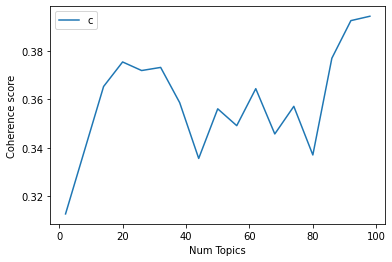

Num Topics = 2  has Coherence Value of 0.3126
Num Topics = 8  has Coherence Value of 0.3389
Num Topics = 14  has Coherence Value of 0.3654
Num Topics = 20  has Coherence Value of 0.3755
Num Topics = 26  has Coherence Value of 0.372
Num Topics = 32  has Coherence Value of 0.3733
Num Topics = 38  has Coherence Value of 0.3587
Num Topics = 44  has Coherence Value of 0.3356
Num Topics = 50  has Coherence Value of 0.3561
Num Topics = 56  has Coherence Value of 0.3491
Num Topics = 62  has Coherence Value of 0.3645
Num Topics = 68  has Coherence Value of 0.3457
Num Topics = 74  has Coherence Value of 0.3571
Num Topics = 80  has Coherence Value of 0.337
Num Topics = 86  has Coherence Value of 0.3771
Num Topics = 92  has Coherence Value of 0.3927
Num Topics = 98  has Coherence Value of 0.3945


In [45]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=100, step=6)
plot_graph_score(coherence_values)
plot_score(coherence_values)


In [ ]:
# Select the model and print the topics (Topics = 62)
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

### Using NMF

In [46]:
def compute_coherence_values_nmf(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of NMF topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = Nmf(
        corpus=corpus,
        num_topics=num_topics,
        id2word=id2word,
        chunksize=100,
        passes=10,
        kappa=.1,
        minimum_probability=0.01,
        w_max_iter=300,
        w_stop_condition=0.0001,
        h_max_iter=100,
        h_stop_condition=0.001,
        eval_every=10,
        normalize=True,
        random_state=42
    )
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

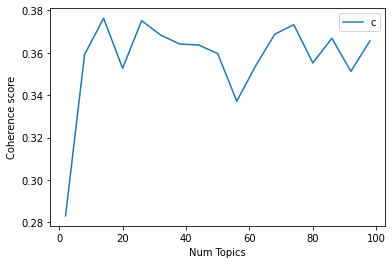

Num Topics = 2  has Coherence Value of 0.283
Num Topics = 8  has Coherence Value of 0.3592
Num Topics = 14  has Coherence Value of 0.3763
Num Topics = 20  has Coherence Value of 0.3527
Num Topics = 26  has Coherence Value of 0.3752
Num Topics = 32  has Coherence Value of 0.3684
Num Topics = 38  has Coherence Value of 0.3641
Num Topics = 44  has Coherence Value of 0.3637
Num Topics = 50  has Coherence Value of 0.3596
Num Topics = 56  has Coherence Value of 0.3371
Num Topics = 62  has Coherence Value of 0.3539
Num Topics = 68  has Coherence Value of 0.3688
Num Topics = 74  has Coherence Value of 0.3733
Num Topics = 80  has Coherence Value of 0.3552
Num Topics = 86  has Coherence Value of 0.3669
Num Topics = 92  has Coherence Value of 0.3513
Num Topics = 98  has Coherence Value of 0.3656


In [47]:
# Can take a long time to run.
model_list_nmf, coherence_values_nmf = compute_coherence_values_nmf(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=100, step=6)
plot_graph_score(coherence_values_nmf)
plot_score(coherence_values_nmf)

In [ ]:
# Select the model and print the topics 
optimal_model = model_list[2]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

### Using HDP


In [68]:
# https://radimrehurek.com/gensim/models/hdpmodel.html
# Unlike its finite counterpart, latent Dirichlet allocation, the HDP topic model infers the number of topics from the data.
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models import HdpModel
hdp = HdpModel(corpus, id2word) 


In [69]:
# Number of topics for which most probable num_words words will be fetched
topic_info = hdp.print_topics(num_topics=-1, num_words=10)
# topic_info = hdp.print_topics() # default by 20 topics
print(len(topic_info))
print(topic_info[0])
# HDP will calculate as many topics as the assigned truncation level. However, it may be the case that many of these topics have 
# basically zero probability of occurring.

150
(0, '0.005*study + 0.004*health + 0.003*patient + 0.003*use + 0.003*risk + 0.003*include + 0.002*result + 0.002*factor + 0.002*individual + 0.002*method')


In [59]:
# a function that performs a rough estimate of the topics' probability weights(alpha values) associated with each topic. 
# Note that this is a rough metric only: it does not account for the probability associated with each word. Even so, 
# it provides a pretty good metric for which topics are meaningful and which aren't:

# def topic_prob_extractor(gensim_hdp):
#     shown_topics = gensim_hdp.show_topics(num_topics=-1, formatted=False)
#     topics_nos = [x[0] for x in shown_topics ]
#     weights = [ sum([item[1] for item in shown_topics[topicN][1]]) for topicN in topics_nos ]

#     return pd.DataFrame({'topic_id' : topics_nos, 'weight' : weights})

def topic_prob_extractor(gensim_hdp, t=-1, w=25, isSorted=True):
    """
    Input the gensim model to get the rough topics' probabilities
    """
    shown_topics = gensim_hdp.show_topics(num_topics=t, num_words=w ,formatted=False)
    topics_nos = [x[0] for x in shown_topics ]
    weights = [ sum([item[1] for item in shown_topics[topicN][1]]) for topicN in topics_nos ]
    if (isSorted):
        return pd.DataFrame({'topic_id' : topics_nos, 'weight' : weights}).sort_values(by = "weight", ascending=False);
    else:
        return pd.DataFrame({'topic_id' : topics_nos, 'weight' : weights});


topic_prob_extractor(hdp)

#alpha = hdp.hdp_to_lda()[0];


,topic_id,weight
0,0,0.072193
1,1,0.065176
2,2,0.048250
3,3,0.045401
6,6,0.042400
...,...,...
76,76,0.028655
82,82,0.028598
66,66,0.028349
126,126,0.028258


# Assignment 2: document-topic distribution


In [77]:
# Finding the dominant topic in each doc
def format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data_lemmatized):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        # print(i)
        # print(row)
        
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data_lemmatized)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(100)
# Perc_Contrib: ercentage contribution of the topic in the given document

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,10.0,0.6185,"risk, use, study, patient, datum, high, result...","[graphical, compute, video, surveillance, mobi..."
1,1,6.0,0.3545,"value, app, resistance, identify, use, analysi...","[background, common, tumor, woman, mali, world..."
2,2,10.0,0.8669,"risk, use, study, patient, datum, high, result...","[highlight, true, incidence, sars_cov, much, h..."
3,3,8.0,0.6987,"health, care, patient, system, base, need, ser...","[impact, individual, society, stratify, care, ..."
4,4,8.0,0.7730,"health, care, patient, system, base, need, ser...","[provider, concern, patient, satisfaction, pot..."
...,...,...,...,...,...
95,95,8.0,0.3702,"health, care, patient, system, base, need, ser...","[electronic, health, record, ehrs, widely, ado..."
96,96,2.0,0.2988,"information, health, datum, online, student, i...","[background, today, increase, methamphetamine,..."
97,97,4.0,0.5071,"public, health, open, tweet, time, vaccination...","[emergence, multidrug, resistant, bacteria, co..."
98,98,11.0,0.8280,"study, include, search, review, use, evidence,...","[met, major, global, health, problem, widely, ..."


In [78]:
# Find the most representative document for each topic
# to help with understanding the topic, you can find the documents a given topic has 
# contributed to the most and infer the topic by reading that document. 

# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head(100)

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.6283,"drug, group, high, face, covid, increase, infa...","[background, system, use, collect, data, sympt..."
1,1.0,0.7657,"intervention, health, study, report, outcome, ...","[background, intimate, partner, violence, key,..."
2,2.0,0.6773,"information, health, datum, online, student, i...","[introduction, cancer, lead, cause, death, las..."
3,3.0,0.4433,"disaster, mutation, screening, co, kidney, adh...","[pollution, become, serious, public, health, i..."
4,4.0,0.8134,"public, health, open, tweet, time, vaccination...","[present, framework, manage, coronavirus_disea..."
5,5.0,0.6638,"incivility, belief, measure, prep, urban, rabi...","[material, metodo, codigo, vece, habitante, ha..."
6,6.0,0.8335,"value, app, resistance, identify, use, analysi...","[mitigate, threat, resistance, african, vector..."
7,7.0,0.6523,"care, patient, cancer, implementation, visit, ...","[key, point, question, patient, characteristic..."
8,8.0,0.9489,"health, care, patient, system, base, need, ser...","[due, covid, epidemic, many, cardiac, rehabili..."
9,9.0,0.5673,"response, digital, resident, subsequent, clini...","[thousand, doctoral, student, early, career, r..."


In [70]:
# Topic distribution across documents

In [76]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics[:10]


,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,10.0,"risk, use, study, patient, datum, high, result...",7.0,0.0185
1.0,6.0,"value, app, resistance, identify, use, analysi...",17.0,0.0450
2.0,10.0,"risk, use, study, patient, datum, high, result...",8.0,0.0212
3.0,8.0,"health, care, patient, system, base, need, ser...",5.0,0.0132
4.0,8.0,"health, care, patient, system, base, need, ser...",9.0,0.0238
5.0,11.0,"study, include, search, review, use, evidence,...",7.0,0.0185
6.0,8.0,"health, care, patient, system, base, need, ser...",15.0,0.0397
7.0,10.0,"risk, use, study, patient, datum, high, result...",14.0,0.0370
8.0,8.0,"health, care, patient, system, base, need, ser...",103.0,0.2725
9.0,11.0,"study, include, search, review, use, evidence,...",4.0,0.0106


# Todo



# Reference

[1]:https://www.youtube.com/watch?v=T05t-SqKArY

[1] LDA: https://www.youtube.com/watch?v=T05t-SqKArY

[2] https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

[3] https://medium.com/analytics-vidhya/topic-modelling-using-latent-dirichlet-allocation-in-scikit-learn-7daf770406c4

[4] https://towardsdatascience.com/topic-modeling-articles-with-nmf-8c6b2a227a45

[5]https://towardsdatascience.com/unsupervised-nlp-topic-models-as-a-supervised-learning-input-cf8ee9e5cf28#:~:text=LDA%20states%20that%20each%20document,likelihood%20of%20word%20co%2Doccurrence.

[6] *An overview of topic modeling and its current applications in bioinformatics*: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5028368/

[7] https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/
